In [1]:
#import google drive files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
#display data
import pandas as pd
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/BreastCancerPrediction_PR/DT-breast-cancer-wisconsin.csv")
data.head()


,Column1,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Decision
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
#check missing values in data set
data.columns[data.isnull().any()].tolist() 

[]

In [4]:
from sklearn.model_selection import train_test_split
y=data.iloc[:, 1]
y.head()


0    M
1    M
2    M
3    M
4    M
Name: Column2, dtype: object

In [5]:
x = data.drop(data.columns[[0, 1]], axis=1)
x.head()

,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
#split data set
x_train, x_test = train_test_split(data, test_size=0.349, random_state=1)

In [32]:
x_train.head()

,Column1,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Decision
93,862009,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,0.2950,1.3730,2.099,25.22,0.005884,0.01491,0.01872,0.009366,0.01884,0.001817,15.10,25.94,97.59,699.4,0.1339,0.1751,0.1381,0.07911,0.2678,0.06603,B
479,911916,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,0.2151,0.06578,0.3147,0.9857,3.070,33.12,0.009197,0.05470,0.08079,0.022150,0.02773,0.006355,17.39,23.05,122.10,939.7,0.1377,0.4462,0.5897,0.17750,0.3318,0.09136,M
81,8611161,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,0.2860,1.0160,1.535,12.96,0.006794,0.03575,0.03980,0.013830,0.02134,0.004603,15.53,23.19,96.66,614.9,0.1536,0.4791,0.4858,0.17080,0.3527,0.10160,B
385,90291,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,0.4157,1.6270,2.914,33.01,0.008312,0.01742,0.03389,0.015760,0.01740,0.002871,15.79,31.71,102.20,758.2,0.1312,0.1581,0.2675,0.13590,0.2477,0.06836,M
440,909411,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,0.2574,1.3760,2.806,18.15,0.008565,0.04638,0.06430,0.017680,0.01516,0.004976,12.36,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532,B


In [21]:
from chefboost import Chefboost as chef

In [19]:
pip install Chefboost

In [23]:
config = {'algorithm', 'C4.5'}

In [48]:
config = {'algorithm': 'C4.5'}
model = chef.fit(data.copy(), config = config)

C4.5  tree is going to be built...
-------------------------
finished in  36.79119324684143  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  569  instances
Labels:  ['M' 'B']
Confusion matrix:  [[212, 0], [0, 357]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [51]:
data.iloc[0]

Column1       842302
Column3        17.99
Column4        10.38
Column5        122.8
Column6         1001
Column7       0.1184
Column8       0.2776
Column9       0.3001
Column10      0.1471
Column11      0.2419
Column12     0.07871
Column13       1.095
Column14      0.9053
Column15       8.589
Column16       153.4
Column17    0.006399
Column18     0.04904
Column19     0.05373
Column20     0.01587
Column21     0.03003
Column22    0.006193
Column23       25.38
Column24       17.33
Column25       184.6
Column26        2019
Column27      0.1622
Column28      0.6656
Column29      0.7119
Column30      0.2654
Column31      0.4601
Column32      0.1189
Decision           M
Name: 0, dtype: object

In [52]:
predictions = chef.predict(model, data.iloc[0])

In [53]:
predictions

'M'

In [55]:
for index, instance in x_test.iterrows():
  prediction = chef.predict(model, instance)
  actual = instance['Decision']
  print(actual, " - ", prediction)

B  -  B
M  -  M
B  -  B
M  -  M
M  -  M
M  -  M
M  -  M
M  -  M
B  -  B
B  -  B
B  -  B
M  -  M
M  -  M
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
M  -  M
B  -  B
B  -  B
M  -  M
B  -  B
M  -  M
B  -  B
B  -  B
M  -  M
M  -  M
M  -  M
M  -  M
B  -  B
M  -  M
M  -  M
B  -  B
B  -  B
M  -  M
B  -  B
M  -  M
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
M  -  M
B  -  B
B  -  B
B  -  B
M  -  M
M  -  M
M  -  M
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
M  -  M
B  -  B
B  -  B
B  -  B
M  -  M
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
M  -  M
B  -  B
B  -  B
B  -  B
B  -  B
M  -  M
M  -  M
B  -  B
M  -  M
M  -  M
M  -  M
B  -  B
M  -  M
B  -  B
M  -  M
B  -  B
M  -  M
B  -  B
B  -  B
M  -  M
B  -  B
M  -  M
B  -  B
B  -  B
M  -  M
B  -  B
B  -  B
M  -  M
M  -  M
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
M  -  M
M  -  M
M  -  M
B  -  B
B  -  B
B  -  B
M  -  M
M  -  M
B  -  B
B  -  B
B  -  B
B  -  B
B  -  B
M  -  M
M  -  M
B  -  B
B  -  B


In [ ]:

p = pd.DataFrame(predictions, columns=['predictions']).to_csv('/content/gdrive/My Drive/Colab Notebooks/prediction_new_10.csv')
#open('/content/gdrive/My Drive/Colab Notebooks/predictions.txt', 'wb').write(results)

In [ ]:
from google.colab import files
files.download('/content/gdrive/My Drive/Colab Notebooks/prediction_new_10.csv')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           B       0.96      0.94      0.95       129\n           M       0.89      0.93      0.91        70\n\n    accuracy                           0.93       199\n   macro avg       0.93      0.93      0.93       199\nweighted avg       0.94      0.93      0.93       199\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[121,   8],
       [  5,  65]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions)

0.9346733668341709

In [ ]:
# import seaborn and plotly
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test, predictions)
plot.set(xlabel='Given', ylabel='Prediction')

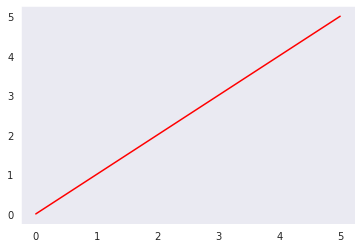

In [ ]:
# generate and graph y = x line
import numpy as np
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')